The local minimum occurs at: -4.999998938845185


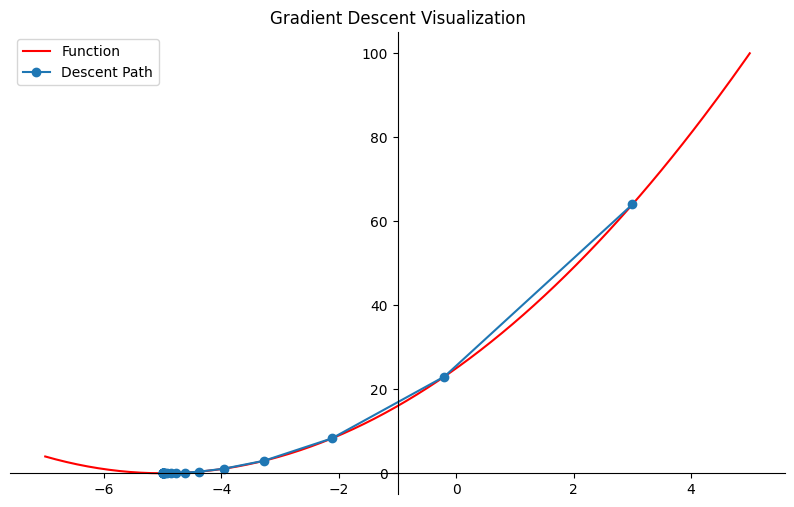

In [ ]:
# ```python
# ----------------------------------
# Practical 3: Gradient Descent Implementation
# ----------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify

x = Symbol("x")

def gradient_descent(function, start, learn_rate, n_iter=10000, tolerance=1e-6):
    # Create symbolic gradient
    gradient = lambdify(x, function.diff(x))
    function_eval = lambdify(x, function)

    points = [start]
    iters = 0
    step_size = tolerance + 1  # ensure loop starts

    while step_size > tolerance and iters < n_iter:
        prev_x = start
        start = start - learn_rate * gradient(prev_x)
        step_size = abs(start - prev_x)
        iters += 1
        points.append(start)

    print("The local minimum occurs at:", start)

    # -------------------------------
    # Visualization
    # -------------------------------
    x_vals = np.linspace(-7, 5, 200)
    y_vals = function_eval(x_vals)

    fig, ax = plt.subplots(figsize=(10, 6))
    # Axes through origin
    ax.spines["left"].set_position("center")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")

    # Plot function curve
    plt.plot(x_vals, y_vals, "r", label="Function")

    # Plot descent path
    plt.plot(points, function_eval(np.array(points)), "-o", label="Descent Path")

    plt.title("Gradient Descent Visualization")
    plt.legend()
    plt.show()


# -------------------------------
# Example run
# -------------------------------
function = (x + 5) ** 2
gradient_descent(function=function, start=3.0, learn_rate=0.2, n_iter=50)
# ```
